In [1]:
from astropy.io import fits
from astropy.wcs import WCS
from glob import glob
from natsort import natsorted

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import numpy as np

from matplotlib.colors import LogNorm

from photutils.detection import DAOStarFinder
from astropy.stats import mad_std

import cometToolkit as comets

from astropy.nddata import Cutout2D

In [2]:
rootPath = "/home/daraghhollman/Main/CometsThesis/"

path="Data/cometData01/"

dataPaths = natsorted(glob(rootPath + path + "*.fits"))

vDataPaths = [ path for path in dataPaths if ( int(path.split("_")[-1][:-5]) - 354) % 3 == 0]
rDataPaths = [ path for path in dataPaths if ( int(path.split("_")[-1][:-5]) - 355) % 3 == 0]
bDataPaths = [ path for path in dataPaths if ( int(path.split("_")[-1][:-5]) - 356) % 3 == 0]
print(vDataPaths)
print(rDataPaths)
print(bDataPaths)

['/home/daraghhollman/Main/CometsThesis/Data/cometData01/ucdA_0354.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData01/ucdA_0357.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData01/ucdA_0360.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData01/ucdA_0363.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData01/ucdA_0366.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData01/ucdA_0369.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData01/ucdA_0372.fits']
['/home/daraghhollman/Main/CometsThesis/Data/cometData01/ucdA_0355.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData01/ucdA_0358.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData01/ucdA_0361.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData01/ucdA_0364.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData01/ucdA_0367.fits', '/home/daraghhollman/Main/CometsThesis/Data/cometData01/ucdA_0370.fits', '/home/daraghhollman/Main/CometsThesis/Data/comet

# Basic Plotting

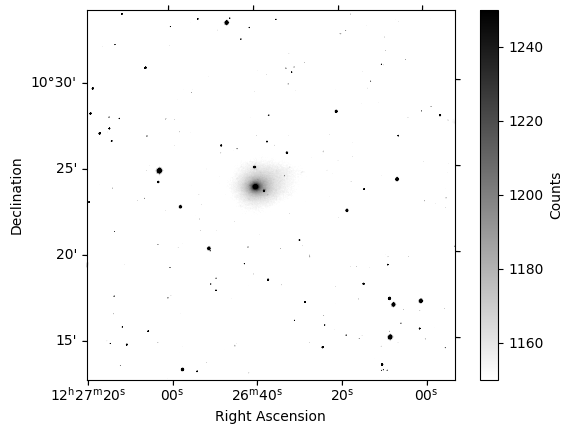

In [3]:
# V band min and max: vmin=1150, vmax =1250

comets.PlotFits(vDataPaths[0], wcsPath=rootPath + "Data/wcs/tsuchinshanWCS.fits",
                vmin=1150, vmax =1250)

wcs = WCS(fits.open(rootPath + "Data/wcs/tsuchinshanWCS.fits")[0].header)

# Finding the optocentre

In [4]:
def StackImages(paths, filter, bounds):
    stackingImages = []

    cutouts = []

    for path in paths:
        image = fits.open(path)[0].data

        centre = comets.FindCometCentre(path, filter, maxCentreDistance=200)

        # Create new fits file centred on the comet
        cutout = Cutout2D(image, (centre[0], centre[1]), (bounds[1] - bounds[0]), wcs=wcs)

        cutouts.append(cutout)

    cutoutWcs = cutouts[0].wcs
    for cutout in cutouts:
        stackingImages.append(np.array(cutout.data))
    
    print(np.shape(stackingImages))

    stackedImage = np.median(stackingImages, axis=0)

    return stackedImage, cutoutWcs

In [5]:
vStackedImage, cutoutWcs = StackImages(vDataPaths, "V", [100, 2054-100])

(7, 1854, 1854)


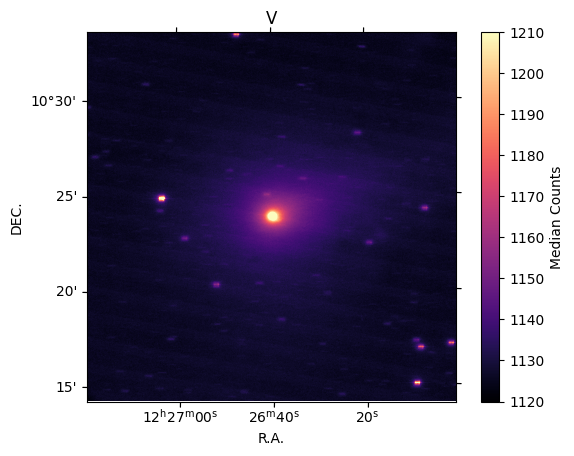

In [6]:
plt.subplot(projection=cutoutWcs)
plt.imshow(vStackedImage, cmap="magma", vmin=1120, vmax =1210)
plt.colorbar(label="Median Counts")
plt.title("V")
plt.xlabel("R.A.")
plt.ylabel("DEC.")
plt.gca().invert_yaxis()

In [7]:
rStackedImage, _ = StackImages(rDataPaths, "R", [100, 2054-100])

(7, 1854, 1854)


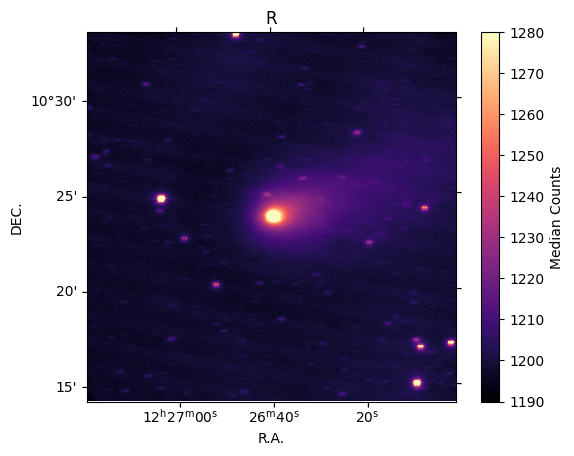

In [8]:
plt.subplot(projection=cutoutWcs)
plt.imshow(rStackedImage, cmap="magma", vmin=1190, vmax=1280)
plt.colorbar(label="Median Counts")
plt.title("R")
plt.xlabel("R.A.")
plt.ylabel("DEC.")
plt.gca().invert_yaxis()

In [9]:
bStackedImage, _ = StackImages(bDataPaths, "B", [100, 2054-100])

(7, 1854, 1854)


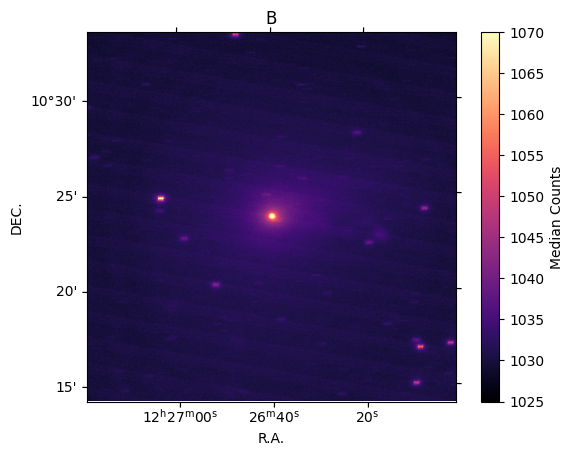

In [10]:
plt.subplot(projection=cutoutWcs)
plt.imshow(bStackedImage, cmap="magma", vmin=1025, vmax=1070)
plt.colorbar(label="Median Counts")
plt.title("B")
plt.xlabel("R.A.")
plt.ylabel("DEC.")
plt.gca().invert_yaxis()

In [12]:
comets.SaveFits(vStackedImage, "../DataProducts/vStacked.fits")
comets.SaveFits(rStackedImage, "../DataProducts/rStacked.fits")
comets.SaveFits(bStackedImage, "../DataProducts/bStacked.fits")

FITS image saved to: ../DataProducts/vStacked.fits
FITS image saved to: ../DataProducts/rStacked.fits
FITS image saved to: ../DataProducts/bStacked.fits
